Task 2:
Role: Part of a retail analytics team and is approached by the Category Manager for Chips. Asked to test the impact of new trial layouts to determine whether the layout should be rolled out to all stores.
Timeline: Trial Period is February 2019 - April 2019
1. Select Control Stores: Explore the data and define metrics for control store
- Think about what makes them a control store
- Look at the drivers and visualize these graphs
- Create a function
2. Assessments of the trial: Give insight for the store (Trial Stores are 77, 86, 88)
- Check each store in comparison with control store to get overall performence
- Define metrics to see if it is sucessful
3. Summarize findings
- Summarize findings for each store and provide a recommendation that outling the impact on sales during trial period
- Visualization are very important and save tem.

Pearson Correlations
- Each case are independent from each other
- Must be a linear relationship between variables (straight line), can be verified using scatterplot (rectangle shape)

Degrees of Correlation (Relationship between 2 quant variables)
- Perfect: Value near +- 1, meaning increasing one variable increase/decrease the other
- High Degree: Values between 0.5 to 1 suggests strong correlation
- Moderate Degree: Values between 0.3 and 0.49
- Low Degree: Values between 0.29
- No Correlation: Value = 0



In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/QVI_data.csv")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [18]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["YEAR_MONTH"] = df["DATE"].dt.strftime("%Y-%m")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  YEAR_MONTH        264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memor

Monthly Sales Experience: (Group by Store, then year-month)
- Only consider stores that have sales every month over July 2018 and June 2019. Select the best control store for each trial store during its pre-trial period.
1. Total Sales Revenue
2. Total Number of Customers
3. Average number of transactions per customer


Total Sales Revenue

In [190]:
df_have_sales = df.copy()
df_have_sales = df_have_sales[df_have_sales["DATE"].between("2018-07-01", "2019-06-30")]
print(f'Min: {df_have_sales["DATE"].min()}')
print(f'Max: {df_have_sales["DATE"].max()}')

Min: 2018-07-01 00:00:00
Max: 2019-06-30 00:00:00


In [191]:
valid_stores = []
df_have_sales_grouped = df_have_sales.groupby("STORE_NBR")
store_count = df_have_sales_grouped["YEAR_MONTH"].nunique()
for store_nbr, count in store_count.items():
    if count == 12:
        valid_stores.append(store_nbr)
print(len(valid_stores))

260


In [192]:
# Ready to use for all metric calculation
df_have_sales_filtered = df_have_sales[df_have_sales["STORE_NBR"].isin(valid_stores)]
df_have_sales_filtered["STORE_NBR"].nunique()

260

In [196]:
df_potential_trial = df_have_sales_filtered[df_have_sales_filtered["YEAR_MONTH"] < "2019-02"]
print(f'Max: {df_potential_trial["YEAR_MONTH"].max()}')

Max: 2019-01


In [197]:
tot_sales_per_store = df_potential_trial.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()
tot_sales_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       206.9
           2018-08       176.1
           2018-09       278.8
           2018-10       188.1
           2018-11       192.6
                         ...  
272        2018-09       304.7
           2018-10       430.6
           2018-11       376.2
           2018-12       403.9
           2019-01       423.0
Name: TOT_SALES, Length: 1820, dtype: float64

In [198]:
unique_customers_per_store = df_potential_trial.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()
unique_customers_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       49
           2018-08       42
           2018-09       59
           2018-10       44
           2018-11       46
                         ..
272        2018-09       32
           2018-10       44
           2018-11       41
           2018-12       47
           2019-01       46
Name: LYLTY_CARD_NBR, Length: 1820, dtype: int64

In [199]:
total_transactions_per_store = df_potential_trial.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].count()
total_transactions_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       52
           2018-08       43
           2018-09       62
           2018-10       45
           2018-11       47
                         ..
272        2018-09       36
           2018-10       51
           2018-11       45
           2018-12       47
           2019-01       50
Name: TXN_ID, Length: 1820, dtype: int64

In [201]:
average_trans_per_store = round(total_transactions_per_store/unique_customers_per_store,2)
average_trans_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       1.06
           2018-08       1.02
           2018-09       1.05
           2018-10       1.02
           2018-11       1.02
                         ... 
272        2018-09       1.12
           2018-10       1.16
           2018-11       1.10
           2018-12       1.00
           2019-01       1.09
Length: 1820, dtype: float64

In [250]:
metrics_df = pd.DataFrame({
    'TOT_SALES': tot_sales_per_store,
    'UNIQUE_CUSTOMERS': unique_customers_per_store,
    'TOTAL_TXNS': total_transactions_per_store,
    'AVG_TXNS_PER_CUST': average_trans_per_store
})
metrics_df

TOT_SALES  UNIQUE_CUSTOMERS  TOTAL_TXNS  \
STORE_NBR YEAR_MONTH                                            
1         2018-07         206.9                49          52   
          2018-08         176.1                42          43   
          2018-09         278.8                59          62   
          2018-10         188.1                44          45   
          2018-11         192.6                46          47   
...                         ...               ...         ...   
272       2018-09         304.7                32          36   
          2018-10         430.6                44          51   
          2018-11         376.2                41          45   
          2018-12         403.9                47          47   
          2019-01         423.0                46          50   

                      AVG_TXNS_PER_CUST  
STORE_NBR YEAR_MONTH                     
1         2018-07                  1.06  
          2018-08                  1.02  
          2018-09                  1.05  
          2018-10                  1.02  
          2018-11                  1.02  
...                                 ...  
272       2018-09                  1.12  
          2018-10                  1.16  
          2018-11                  1.10  
          2018-12                  1.00  
          2019-01                  1.09  

[1820 rows x 4 columns]

In [267]:
store_list = metrics_df.index.get_level_values('STORE_NBR').unique()
store_list

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272],
      dtype='int64', name='STORE_NBR', length=260)

Pearson Filtering Rules
1. Find stores that have the same sale period
2. Then conduct actual similarity test

In [289]:
def pearson_correlation(trial, trial_nbr, potential_control, store_list): # we also need to compare months
    trial_total_sales = trial["TOT_SALES"]
    trial_unique_customers = trial["UNIQUE_CUSTOMERS"]
    trial_average_trans = trial["AVG_TXNS_PER_CUST"]
    current_closest_store = 0 # we don't have a 0
    current_closest_coor = 0
    for cur_store_nbr in store_list:
        if cur_store_nbr != trial_nbr:
            potential_total_sales = potential_control.loc[cur_store_nbr]["TOT_SALES"]
            potetial_unique_customers = potential_control.loc[cur_store_nbr]["UNIQUE_CUSTOMERS"]
            potential_average_trans = potential_control.loc[cur_store_nbr]["AVG_TXNS_PER_CUST"]
            cur_sales_coor = trial_total_sales.corr(potential_total_sales, method="pearson")
            cur_unique_customers_coor = trial_unique_customers.corr(potetial_unique_customers, method="pearson")
            cur_average_trans_coor = trial_average_trans.corr(potential_average_trans, method="pearson")
            coor_average = round((cur_sales_coor + cur_unique_customers_coor + cur_average_trans_coor)/3,2)
            if coor_average >= current_closest_coor:
                current_closest_store = cur_store_nbr
                current_closest_coor = coor_average
    return current_closest_store, current_closest_coor

For each Trial
1. Compare Correlation for each of the three individually
- Compare the months individually to see if they match
2. If the similarity is higher than a certain metric (0.65?) then we average it out
3. Save hte closest average similarity

In [291]:
trial_store_77 = metrics_df.loc[77]
control_store_77, control_store_77_coor = pearson_correlation(trial_store_77, 77, metrics_df, store_list)
print(f"The control store for trial store 77 is: {control_store_77}, correlation is: {control_store_77_coor}")
trial_store_86 = metrics_df.loc[86]
control_store_86, control_store_86_coor = pearson_correlation(trial_store_86, 86, metrics_df, store_list)
print(f"The control store for trial store 86 is: {control_store_86}, correlation is: {control_store_86_coor}")
trial_store_88 = metrics_df.loc[88]
control_store_88, control_store_88_coor = pearson_correlation(trial_store_88, 88, metrics_df, store_list)
print(f"The control store for trial store 88 is: {control_store_88}, correlation is: {control_store_88_coor}")

c:\Users\simch\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\simch\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


The control store for trial store 77 is: 119, correlation is: 0.85
The control store for trial store 86 is: 138, correlation is: 0.72
The control store for trial store 88 is: 178, correlation is: 0.74


In [307]:
comparison_store_list = [77, 86, 88]
comparison_store_list.append(control_store_77)
comparison_store_list.append(control_store_86)
comparison_store_list.append(control_store_88)
comparison_store_list

[77, 86, 88, 119, 138, 178]

Compare each Trial store with its Control store during the trial period (February 2019 - April 2019)

In [314]:
df_comparison = df_have_sales_filtered[df_have_sales_filtered["STORE_NBR"].isin(comparison_store_list)]
df_comparison = df_comparison[(df_comparison["YEAR_MONTH"] >= "2019-02") & (df_comparison["YEAR_MONTH"] <= "2019-04")]
print(f'Min: {df_comparison["YEAR_MONTH"].min()}')
print(f'Max: {df_comparison["YEAR_MONTH"].max()}')
df_comparison

Min: 2019-02
Max: 2019-04


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,2019-03
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2019-04
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2019-02
73372,77003,2019-03-18,77,74917,80,Natural ChipCo Sea Salt & Vinegr 175g,1,3.0,175,NATURAL,OLDER FAMILIES,Mainstream,2019-03
73377,77007,2019-03-20,77,74923,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Premium,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175571,178261,2019-03-06,178,179194,23,Cheezels Cheese 330g,2,11.4,330,CHEEZELS,NEW FAMILIES,Mainstream,2019-03
175575,178262,2019-02-14,178,179197,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,90,SUNBITES,OLDER FAMILIES,Budget,2019-02
175576,178262,2019-03-21,178,179198,67,RRD Chilli& Coconut 150g,2,5.4,150,RRD,OLDER FAMILIES,Budget,2019-03
175577,178262,2019-04-12,178,179199,15,Twisties Cheese 270g,2,9.2,270,TWISTIES,OLDER FAMILIES,Budget,2019-04


In [315]:
tot_sales_per_store_comp = df_comparison.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()
unique_customers_per_store_comp = df_comparison.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()
total_transactions_per_store_comp = df_comparison.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].count()
average_trans_per_store_comp = round(total_transactions_per_store_comp/unique_customers_per_store_comp,2)
comp_df = pd.DataFrame({
    'TOT_SALES': tot_sales_per_store_comp,
    'UNIQUE_CUSTOMERS': unique_customers_per_store_comp,
    'TOTAL_TXNS': total_transactions_per_store_comp,
    'AVG_TXNS_PER_CUST': average_trans_per_store_comp
})
comp_df

TOT_SALES  UNIQUE_CUSTOMERS  TOTAL_TXNS  \
STORE_NBR YEAR_MONTH                                            
77        2019-02         235.0                45          45   
          2019-03         278.5                50          55   
          2019-04         263.5                47          48   
86        2019-02         913.2               107         139   
          2019-03        1026.8               115         142   
          2019-04         848.2               105         127   
88        2019-02        1370.2               124         154   
          2019-03        1477.2               134         170   
          2019-04        1439.4               128         162   
119       2019-02        1004.3                99         117   
          2019-03         977.7                97         114   
          2019-04         879.1                85         104   
138       2019-02         748.6                90         112   
          2019-03         940.6               106         138   
          2019-04         834.2               106         128   
178       2019-02        1088.8               107         147   
          2019-03         998.8               114         143   
          2019-04        1059.8               117         150   

                      AVG_TXNS_PER_CUST  
STORE_NBR YEAR_MONTH                     
77        2019-02                  1.00  
          2019-03                  1.10  
          2019-04                  1.02  
86        2019-02                  1.30  
          2019-03                  1.23  
          2019-04                  1.21  
88        2019-02                  1.24  
          2019-03                  1.27  
          2019-04                  1.27  
119       2019-02                  1.18  
          2019-03                  1.18  
          2019-04                  1.22  
138       2019-02                  1.24  
          2019-03                  1.30  
          2019-04                  1.21  
178       2019-02                  1.37  
          2019-03                  1.25  
          2019-04                  1.28

Comparison for Trial Store 77, Control store is 119

In [345]:
store_77_stats = comp_df.loc[77].reset_index()
store_77_stats.insert(1, "STORE_NBR", [77,77,77])
store_119_stats = comp_df.loc[119].reset_index()
store_119_stats.insert(1, "STORE_NBR", [119, 119, 119])
store_77_119 = pd.concat([store_77_stats, store_119_stats])
store_77_119

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUSTOMERS,TOTAL_TXNS,AVG_TXNS_PER_CUST
0,2019-02,77,235.0,45,45,1.00
1,2019-03,77,278.5,50,55,1.10
2,2019-04,77,263.5,47,48,1.02
0,2019-02,119,1004.3,99,117,1.18
1,2019-03,119,977.7,97,114,1.18
2,2019-04,119,879.1,85,104,1.22


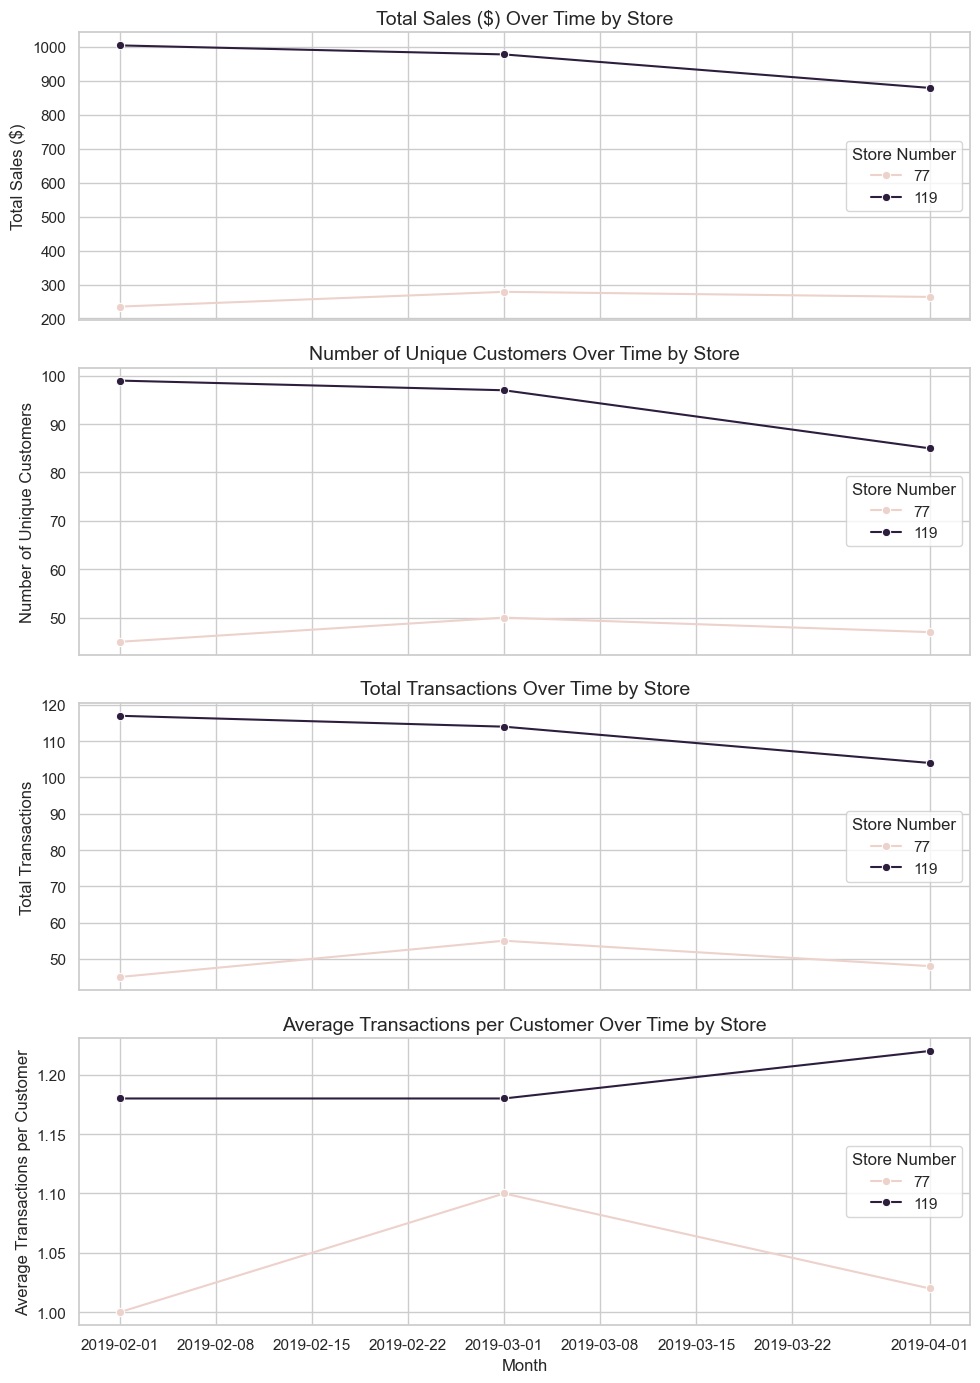

In [368]:
store_77_119['YEAR_MONTH'] = pd.to_datetime(store_77_119['YEAR_MONTH'])
sns.set_style("whitegrid")
metrics_info = {
    'TOT_SALES': 'Total Sales ($)',
    'UNIQUE_CUSTOMERS': 'Number of Unique Customers',
    'TOTAL_TXNS': 'Total Transactions',
    'AVG_TXNS_PER_CUST': 'Average Transactions per Customer'
}
fig, axes = plt.subplots(len(metrics_info), 1, figsize=(10, 14), sharex=True)
for i, (metric, ylabel) in enumerate(metrics_info.items()):
    sns.lineplot(
        data=store_77_119,
        x='YEAR_MONTH',
        y=metric,
        hue='STORE_NBR',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{ylabel} Over Time by Store', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].legend(title='Store Number')
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

In [362]:
store_means = store_77_119.groupby("STORE_NBR")[
    ["TOT_SALES", "UNIQUE_CUSTOMERS", "AVG_TXNS_PER_CUST"]
].mean().reset_index()
trial_metrics = store_means[store_means["STORE_NBR"] == 77]
control_metrics = store_means[store_means["STORE_NBR"] == 119]

percent_diff = (
    (trial_metrics.iloc[:, 1:] - control_metrics.iloc[:, 1:]) / control_metrics.iloc[:, 1:]
) * 100

percent_diff = percent_diff.T.reset_index()
percent_diff = percent_diff.rename(columns={0: "Percent_Difference", "index": "Metric"})


Trial Store 86, 138

In [346]:
store_86_stats = comp_df.loc[86].reset_index()
store_86_stats.insert(1, "STORE_NBR", [86, 86, 86])
store_138_stats = comp_df.loc[138].reset_index()
store_138_stats.insert(1, "STORE_NBR", [138, 138, 138])
store_86_138 = pd.concat([store_86_stats, store_138_stats])
store_86_138

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUSTOMERS,TOTAL_TXNS,AVG_TXNS_PER_CUST
0,2019-02,86,913.2,107,139,1.30
1,2019-03,86,1026.8,115,142,1.23
2,2019-04,86,848.2,105,127,1.21
0,2019-02,138,748.6,90,112,1.24
1,2019-03,138,940.6,106,138,1.30
2,2019-04,138,834.2,106,128,1.21


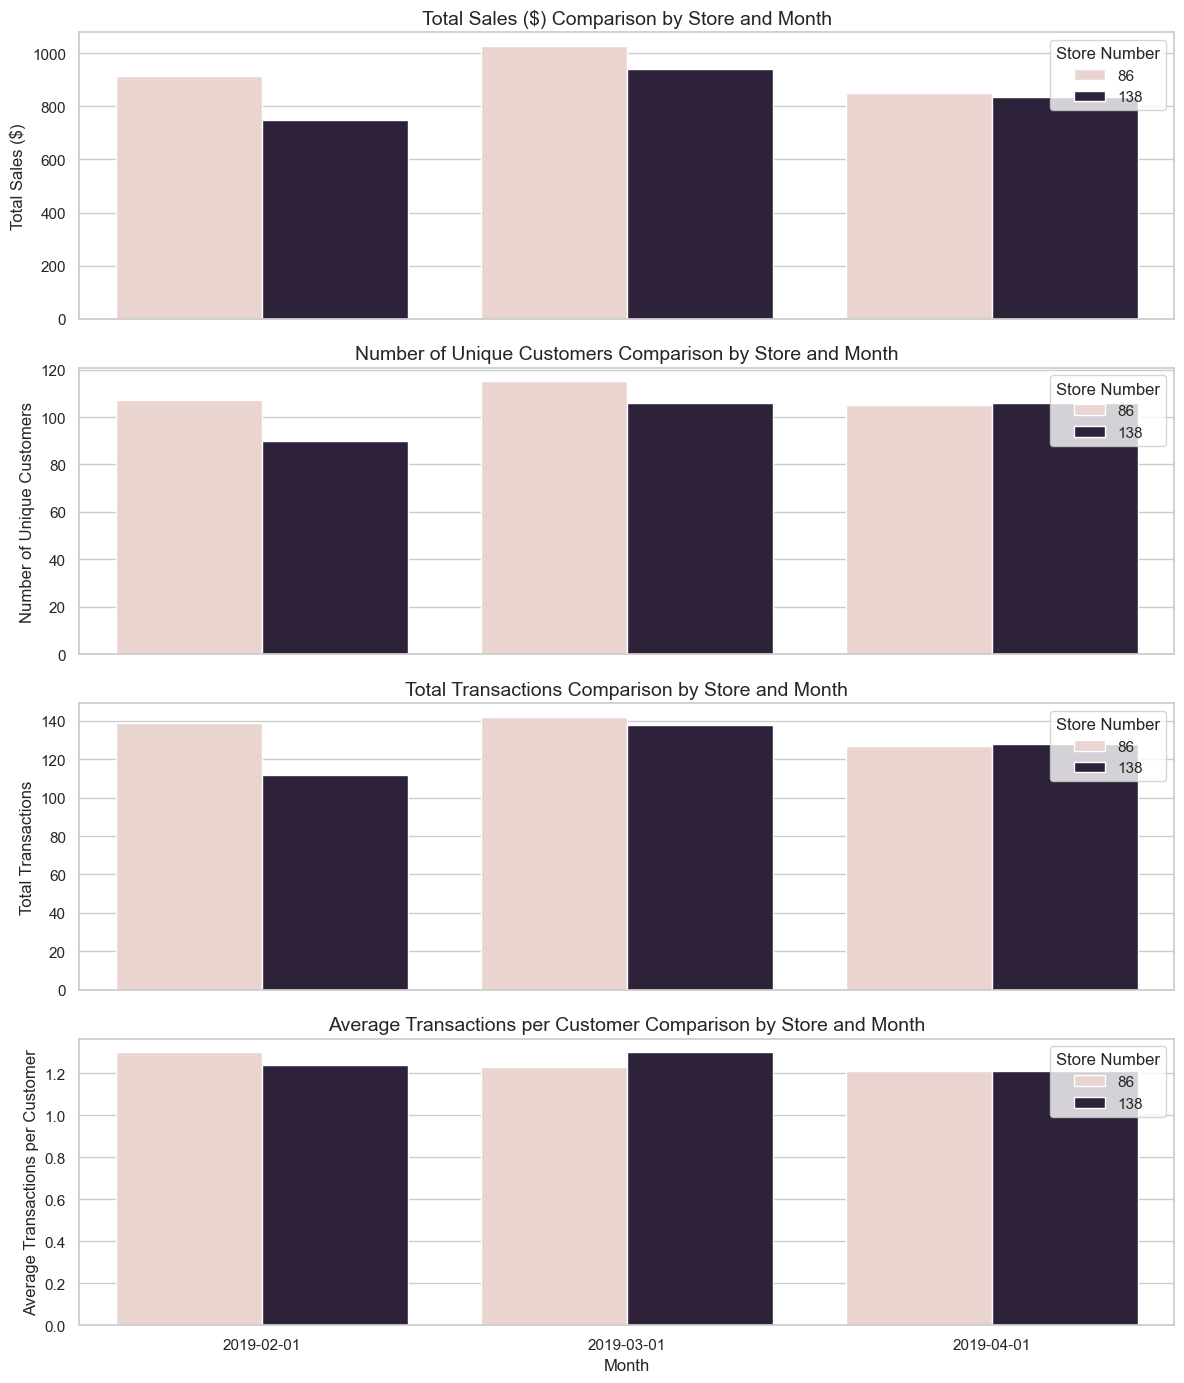

In [ ]:
store_86_138['YEAR_MONTH'] = pd.to_datetime(store_86_138['YEAR_MONTH'])
metrics_info = {
    'TOT_SALES': 'Total Sales ($)',
    'UNIQUE_CUSTOMERS': 'Number of Unique Customers',
    'TOTAL_TXNS': 'Total Transactions',
    'AVG_TXNS_PER_CUST': 'Average Transactions per Customer'
}
fig, axes = plt.subplots(len(metrics_info), 1, figsize=(12, 14), sharex=True)
for i, (metric, ylabel) in enumerate(metrics_info.items()):
    sns.barplot(
        data=store_86_138,
        x='YEAR_MONTH',
        y=metric,
        hue='STORE_NBR',
        ax=axes[i]
    )
    axes[i].set_title(f'{ylabel} Comparison by Store and Month', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].legend(title='Store Number')
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()


Trial Store 88, Control 178

In [370]:
store_88_stats = comp_df.loc[88].reset_index()
store_88_stats.insert(1, "STORE_NBR", [88, 88, 88])
store_178_stats = comp_df.loc[178].reset_index()
store_178_stats.insert(1, "STORE_NBR", [178, 178, 178])
store_88_178 = pd.concat([store_88_stats, store_178_stats])
store_88_178

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUSTOMERS,TOTAL_TXNS,AVG_TXNS_PER_CUST
0,2019-02,88,1370.2,124,154,1.24
1,2019-03,88,1477.2,134,170,1.27
2,2019-04,88,1439.4,128,162,1.27
0,2019-02,178,1088.8,107,147,1.37
1,2019-03,178,998.8,114,143,1.25
2,2019-04,178,1059.8,117,150,1.28


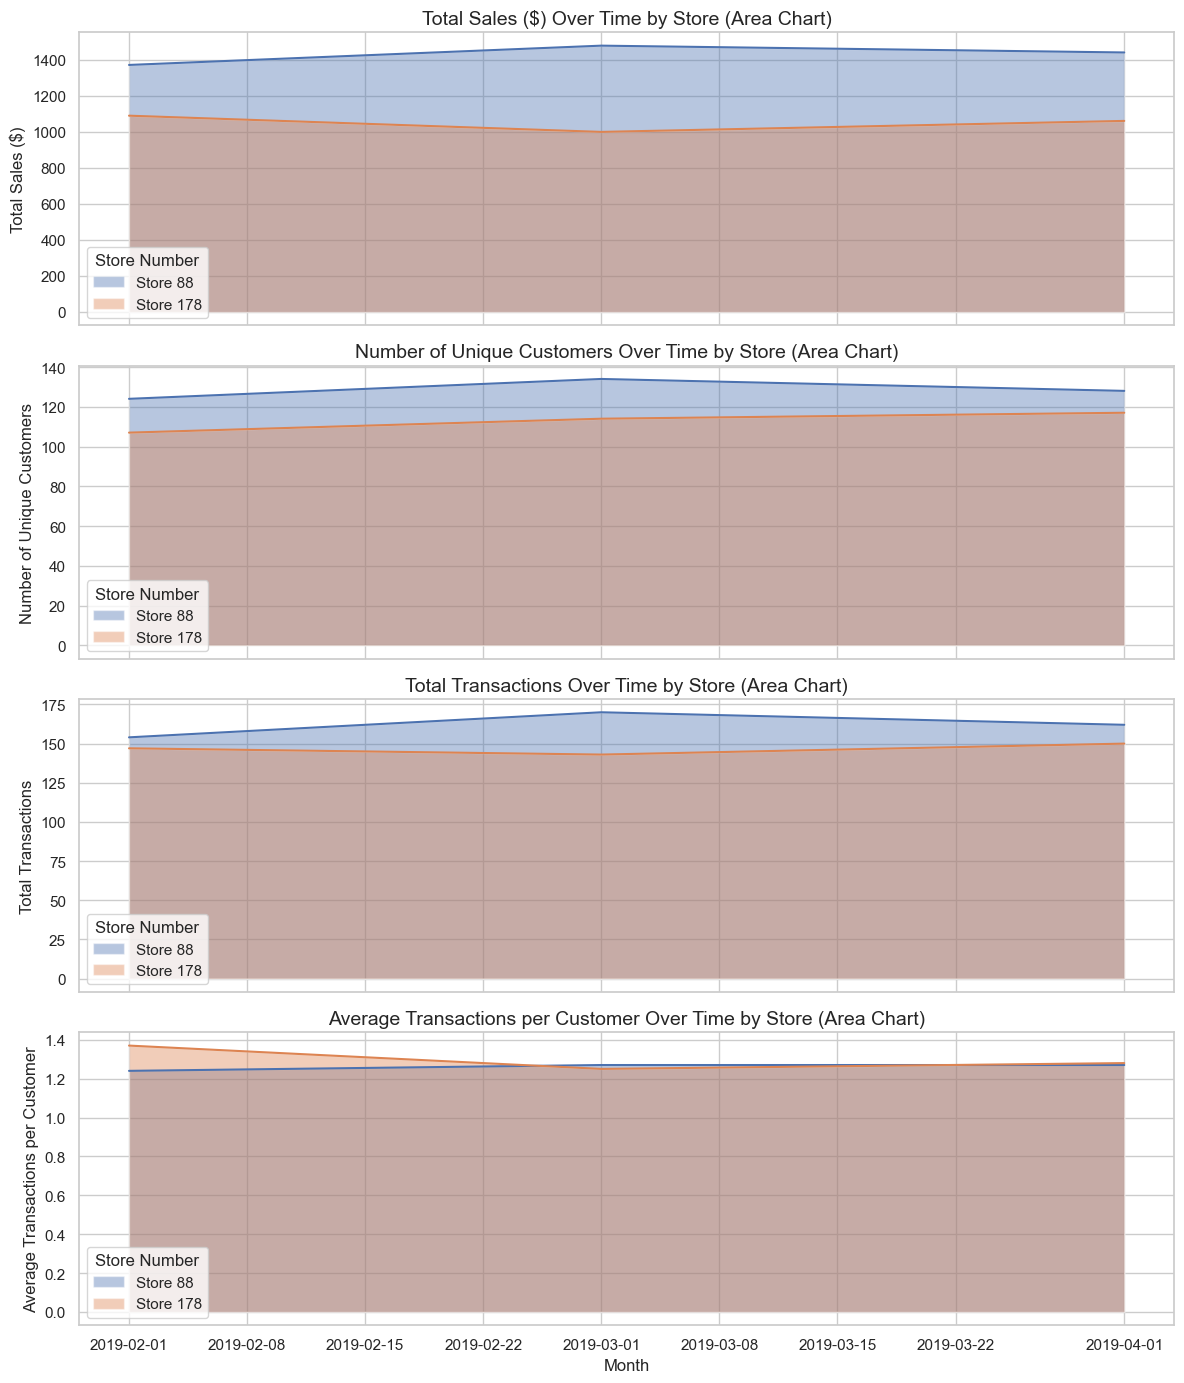

In [371]:
store_88_178['YEAR_MONTH'] = pd.to_datetime(store_88_178['YEAR_MONTH'])
metrics_info = {
    'TOT_SALES': 'Total Sales ($)',
    'UNIQUE_CUSTOMERS': 'Number of Unique Customers',
    'TOTAL_TXNS': 'Total Transactions',
    'AVG_TXNS_PER_CUST': 'Average Transactions per Customer'
}
fig, axes = plt.subplots(len(metrics_info), 1, figsize=(12, 14), sharex=True)
for i, (metric, ylabel) in enumerate(metrics_info.items()):
    for store in store_88_178['STORE_NBR'].unique():
        data = store_88_178[store_88_178['STORE_NBR'] == store]
        axes[i].fill_between(data['YEAR_MONTH'], 
                             data[metric], 
                             alpha=0.4, 
                             label=f'Store {store}')
        axes[i].plot(data['YEAR_MONTH'], data[metric])  # plot line on top for clarity
    axes[i].set_title(f'{ylabel} Over Time by Store (Area Chart)', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].legend(title='Store Number')
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()
